In [5]:
import os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
import json

In [6]:
os.listdir("../new/temp")

['20230901_VIT_DESY3_half',
 '20230901_VIT_DESY3',
 '20230901_VIT_LSSTY1',
 '20230901_VIT_LSSTY10',
 '20230901_resnet_DESY3_half',
 '20230901_resnet_DESY3',
 '20230901_resnet_LSSTY10']

# Vision Transformer

In [7]:
def get_history_file(model_name):
    chkpts = os.listdir(f"../new/temp/{model_name}")
    chkpts = [int(chkpt.split("-")[1]) for chkpt in chkpts if "checkpoint" in chkpt]
    highest_chkpt = max(chkpts)
    return f"../new/temp/{model_name}/checkpoint-{highest_chkpt}/trainer_state.json"

In [10]:
history_file = get_history_file("20230901_VIT_LSSTY10")

with open(history_file, "r") as f:
    jsondata = json.load(f)
    best_metric = jsondata["best_metric"]
    best_model_checkpoint = jsondata["best_model_checkpoint"]
    best_epoch = int(int(best_model_checkpoint.split("-")[1]) / 2800 * 200)
    print(best_metric, best_model_checkpoint, best_epoch)
    
    history = jsondata["log_history"]
    vit_epochs = np.array([entry["epoch"] for entry in history])
    vit_eval_loss = np.array([entry[list(entry.keys())[1]] for entry in history])

ValueError: max() arg is an empty sequence

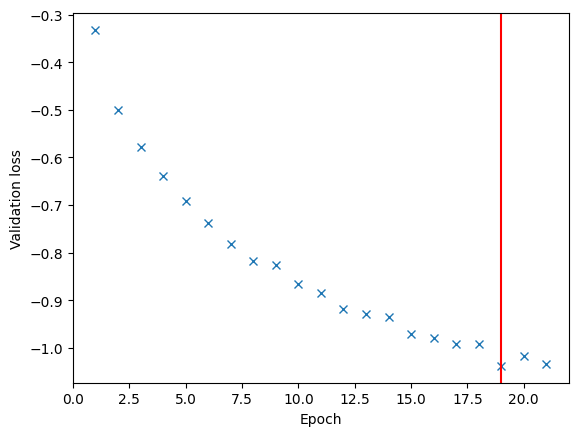

In [11]:
plt.figure()
plt.plot(vit_epochs, vit_eval_loss, marker="x", ls="none")
plt.axvline(best_epoch, color="red")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.show()
plt.close()

# ResNet

In [9]:
def get_history_file(model_name):
    # return glob.glob(f'../temp/{model_name}/*logs*')
    return glob.glob(f'../new/temp/{model_name}/*logs*')

In [12]:
# history_files = get_history_file("20230813_cnn_DES")
history_files = get_history_file("20230901_resnet_DESY3_half")

rn_val_loss = []
rn_epochs = []
for history_file in history_files:
    with open(history_file, "r") as f:
        for line in f.readlines():
            if not "Val Loss" in line:
                continue
            rn_val_loss += [float(line.split()[-1])]
            rn_epochs += [int(line.split()[1])]

best_epoch = rn_epochs[np.argmin(rn_val_loss)]

len(rn_epochs), len(rn_val_loss), best_epoch

(24, 24, 20)

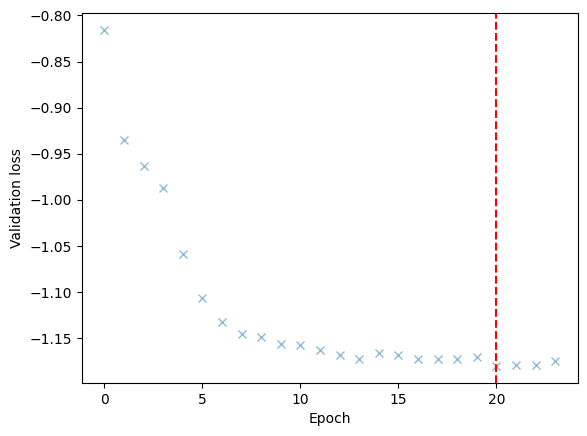

In [13]:
plt.figure()
plt.plot(rn_epochs, rn_val_loss, marker="x", ls="none", alpha=0.5)
plt.axvline(x=best_epoch, color="red", ls="--", label="Best epoch")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.show()
plt.close()

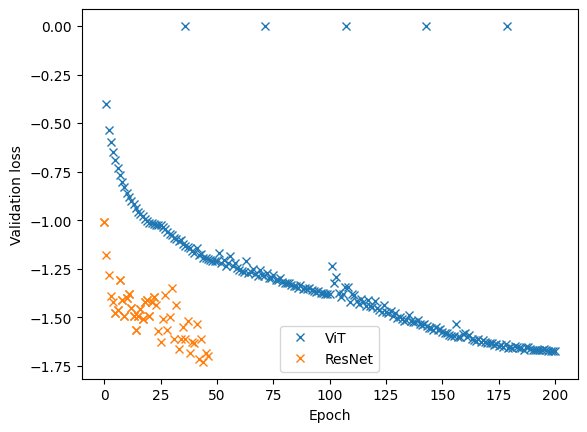

In [17]:
plt.figure
plt.plot(vit_epochs, vit_eval_loss, marker="x", ls="none", label="ViT")
plt.plot(rn_epochs, rn_val_loss, marker="x", ls="none", label="ResNet")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.legend()
plt.show()
plt.close()